# Machine learning using the FIFA 19

## Import necessary packages

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("dark")

## Import the data

In [4]:
data_frame = pd.read_csv('data.csv')
data_frame.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Filter data frame by age

In [7]:
data_frame[data_frame['Age']==30].head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
23,23,153079,S. Agüero,30,https://cdn.sofifa.org/players/4/19/153079.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,89,Manchester City,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
35,35,176676,Marcelo,30,https://cdn.sofifa.org/players/4/19/176676.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Real Madrid,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,€88.2M
38,38,167664,G. Higuaín,30,https://cdn.sofifa.org/players/4/19/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,88,88,Milan,...,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
52,52,171877,M. Hamšík,30,https://cdn.sofifa.org/players/4/19/171877.png,Slovakia,https://cdn.sofifa.org/flags/43.png,87,87,Napoli,...,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,€79.1M
53,53,168651,I. Rakitić,30,https://cdn.sofifa.org/players/4/19/168651.png,Croatia,https://cdn.sofifa.org/flags/10.png,87,87,FC Barcelona,...,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0,€95.3M


## Good deal players
Find players with good skill and low salary

In [18]:
df1 = pd.DataFrame(data_frame, columns=['Name', 'Wage', 'Value'])
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0
df1['Wage'] = df1['Wage'].replace('[\€,]','', regex=True).apply(value_to_float)
df1['Value'] = df1['Value'].replace('[\€,]','', regex=True).apply(value_to_float)

Find the biggest gap between the wage and the value

In [20]:
df1['difference'] = df1['Value'] - df1['Wage']
df1.sort_values('difference', ascending=False)

,Name,Wage,Value,difference
2,Neymar Jr,290000.0,118500000.0,118210000.0
0,L. Messi,565000.0,110500000.0,109935000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
5,E. Hazard,340000.0,93000000.0,92660000.0
15,P. Dybala,205000.0,89000000.0,88795000.0
...,...,...,...,...
17752,S. Phillips,1000.0,0.0,-1000.0
12192,H. Sulaimani,3000.0,0.0,-3000.0
3550,S. Nakamura,4000.0,0.0,-4000.0
4228,B. Nivet,5000.0,0.0,-5000.0


# Visualization

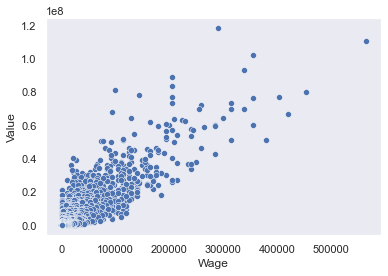

In [28]:
graph = sns.scatterplot(x='Wage', y='Value', data=df1)

In [34]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[('index', '$index'),
            ("(Wage,Value)","(@Wage,@Value)"),
            ("Name", "@Name")])
hover = HoverTool()
p = figure(title='Soccer 2019', x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=10, source=df1)
show(p)